In [1]:
print("Maya Simhi id:207487653\nHodaya Cohen id:322617408") # TODO - CHANGE TO YOUR NAMES AND IDs

Maya Simhi id:207487653
Hodaya Cohen id:322617408


#**Introduction to Digital Image Processing**
#**Course Code: 361.1.4751**
###**Exercise 1 - BASIC IMAGE OPERATIONS**

For any questions regarding this assignment, please refer to the course forum on the Moodle website. For personal questions **only**, please email  [thomasm@post.bgu.ac.il](mailto:thomasm@post.bgu.ac.il).

Now that your notebook is set up, we can load the data into the notebook. The code below load the data through mounting Google Drive.
Copy the attached files to your drive and make sure that you save the images outputs also on your drive.   

Here are some resources to help you get started:

- http://colab.research.google.com/notebooks/io.ipynb

In [2]:
from google.colab import drive
import os


drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/images/EX1/Images'

Mounted at /content/drive


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## **1. Histogram Manipulation**

### **1.1 Reading the Image**


1.   Read the image named picasso.jpg and transform it into a grayscale image of type double using cv2.cvtColor() with cv2.COLOR_BGR2GRAY and np.float64().

In [4]:
image_path = f"{drive_path}/picasso.jpg"

# Read the image named picasso.jpg
image = cv2.imread(image_path)


# Transform it into a grayscale image of type double using cv2.cvtColor() with cv2.COLOR_BGR2GRAY
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert np.float64()
grayscale_image_double = np.float64(grayscale_image)



2.   Display the image using plt.imshow() and set the parameter cmap to gray. Add a colorbar to the image.



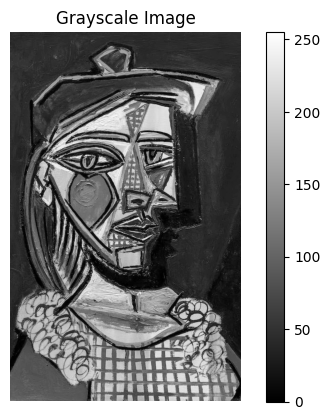

In [5]:
# Display the image using plt.imshow()
plt.imshow(grayscale_image_double, cmap='gray') # Set the parameter cmap to gray
plt.title("Grayscale Image")
plt.axis('off')
# Add a colorbar to the image.
plt.colorbar()
plt.show()

3. Write your own function named dip_GN_imread(file_name) that will return a normalized grayscale image. Read the image using Python’s cv2.imread() function, transform it into a grayscale of type double using cv2.cvtColor() with cv2.COLOR_BGR2GRAY and np.float64(). Normalize the image between [0, 1] using:

$$
\frac{img - \text{np.min}(img)}{\text{np.max}(img) - \text{np.min}(img)}
$$

We will use this function from section 1.3

In [6]:
def dip_GN_imread(file_name):
  # Read the image using Python’s cv2.imread()
  img = cv2.imread(file_name)
  # Transform it into a grayscale of type double using cv2.cvtColor() with cv2.COLOR_BGR2GRAY
  grayscale_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # And np.float64()
  grayscale_image_float = np.float64(grayscale_image)
  # Normalize the image between [0, 1]
  normalized_image = (grayscale_image_float - np.min(grayscale_image_float)) / (np.max(grayscale_image_float) - np.min(grayscale_image_float))

  return normalized_image



### **1.2 Histogram Construction**
Use the above grayscale picasso image (not the normalized) for the following sections:
1. Write your own function named dip_histogram(img, nbins) that will return
the histogram of the image ’img’ using ’nbins’ bins.

In [7]:
def dip_histogram(img, nbins):

    # Get minimum and maximum pixel values
    img_min = img.min()
    img_max = img.max()

    # Calculate bin width
    bin_width = (img_max - img_min) / nbins

    # Initialize histogram array
    hist = [0] * nbins

    # For loop through each pixel and increment corresponding bin
    for pixel_value in img.flatten():
        bin_index = int((pixel_value - img_min) // bin_width)
        if 0 <= bin_index < nbins:  # Handle edge cases
            hist[bin_index] += 1

    # Calculate bin edges
    bin_edges = [img_min + i * bin_width for i in range(nbins + 1)]

    return hist, bin_edges



2. Display the generated histogram using 256 bins. Compare your result to Python’s np.histogram() function (use a quan-
titative measurement). Explain the results.

Note: Here, you can use the  np.histogram() functions only for
checking your answer.

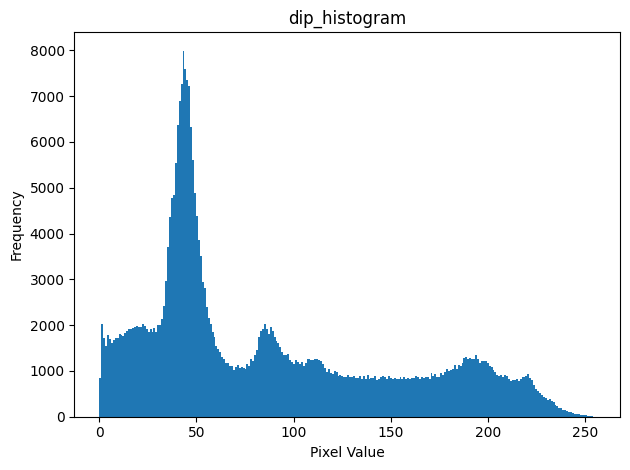

Mean Squared Error (MSE) between histograms: 0.140625
We see there is a small diffrance between the 2, I think this is becuase of the calculations I did that only saved up to 64 bits and not more, also maybe there was a better way to hanndle edegs


In [8]:
# Display the generated histogram using 256 bins
hist_dip, bin_edges_dip = dip_histogram(grayscale_image, nbins=256)

plt.bar(bin_edges_dip[:-1], hist_dip, width=bin_edges_dip[1] - bin_edges_dip[0], align='edge')
plt.title("dip_histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Compare your result to Python’s np.histogram()
hist_np, bin_edges_np = np.histogram(grayscale_image.flatten(), bins=256, range=(grayscale_image.min(), grayscale_image.max()))
# Use a quan- titative measurement
mse = np.mean((hist_dip - hist_np)**2)
print(f"Mean Squared Error (MSE) between histograms: {mse}")
# Explain the results
print("We see there is a small diffrance between the 2, I think this is becuase of the calculations I did that only saved up to 64 bits and not more, also maybe there was a better way to hanndle edegs")

### **1.3 Brightness**
From now on, use the normalized gray scale image version of picasso.jpg using the dip_GN_imread(file_name) function.
1. Write your own function named adjust_brightness(img, action, parameter)
in which ’action’ could get either ’mul’ for multiplication or ’add ’ for
addition. Adjust the brightness of ’img’ using the ’parameter’. The output
of the function will be the modified image. The output of the function
will be the modified image. Make sure the output image stay in the [0, 1]
range.

In [9]:
def adjust_brightness(img, action, parameter):

    if action == 'mul':
        modified_image = img * parameter
    elif action == 'add':
        modified_image = img + parameter

    # Make sure the output image stay in the [0, 1] range
    modified_image_in_range = np.clip(modified_image, 0, 1)
    return modified_image_in_range

2. Display the original gray scale image together with **one** adjusted image of increased or decreased brightness. Explain the results.

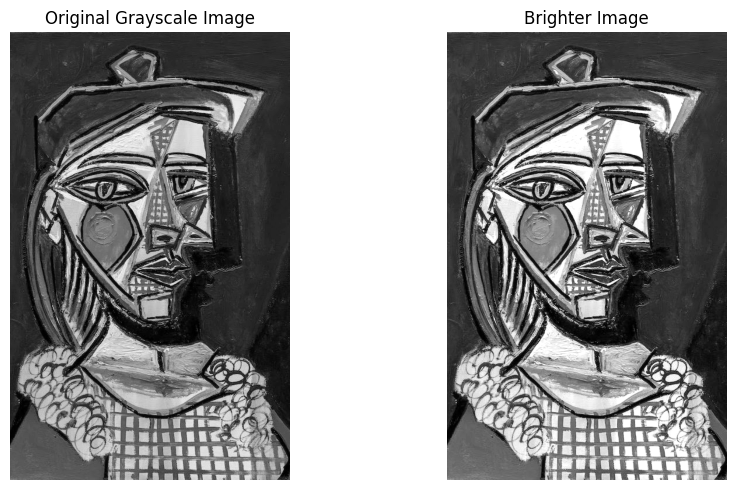

As expected, we see the birghter image to be brightened


In [10]:
normalized_image = dip_GN_imread(image_path)
brighter_image = adjust_brightness(normalized_image, action='mul', parameter=1.2)

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(normalized_image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(brighter_image, cmap='gray')
plt.title("Brighter Image")
plt.axis('off')

plt.tight_layout()
plt.show()
# Explain the results
print("As expected, we see the birghter image to be brightened")

### **1.4 Contrast**

1. Write your own function named adjust_contrast(img,range_low,range_high)
that will change the contrast of the image ’img’ and in which the range_low,range_high
parameters will determine the new dynamic range of modified image. The
output of the function will be the modified image. You should use linear
mapping.

In [11]:
def adjust_contrast(img, range_low, range_high):
    # Linear mapping formula
    modified_image = img * (range_high - range_low) + range_low  # Map to new range

    # Clip values to stay within [0, 1] (Not sure I need it wasn't asked, but I added it anyway)
    #modified_image_in_range = np.clip(modified_image, 0, 1)

    return modified_image



2. Calculate the modified image for a new dynamic ranges of [0.45, 0.9] and
[0.4, 0.5] and display the images and corresponding histograms. Explain
the effect of each new range.

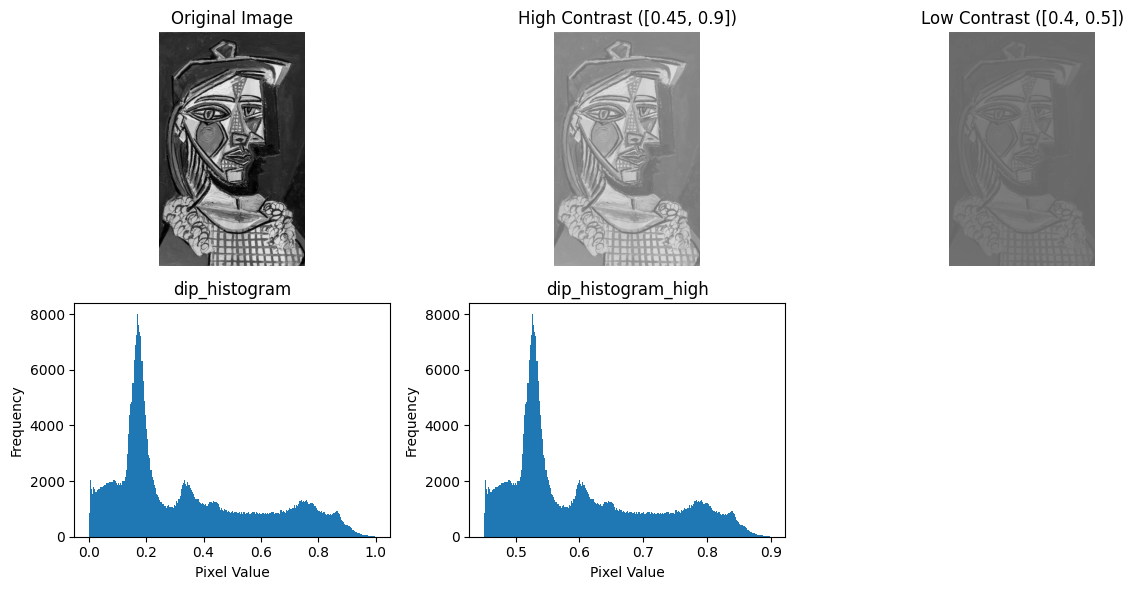

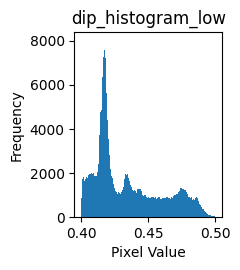

As expected we see that the regulare histogram is etween 0 to 1 the high between 0.45 to 0.9 and the low between 0.4 to 0.5 
 also we see that the high contrast is brighter and low is darker


In [32]:
# Dynamic ranges of [0.45, 0.9]
high_contrast_image = adjust_contrast(normalized_image, range_low=0.45, range_high=0.9)

# Dynamic ranges of [0.4, 0.5]
low_contrast_image = adjust_contrast(normalized_image, range_low=0.4, range_high=0.5)

# Display images and histograms
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(normalized_image, cmap='gray', vmin = 0, vmax =1) ###
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(high_contrast_image, cmap='gray', vmin = 0, vmax =1 ) ###
plt.title("High Contrast ([0.45, 0.9])")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(low_contrast_image, cmap='gray', vmin = 0, vmax =1 ) ###
plt.title("Low Contrast ([0.4, 0.5])")
plt.axis('off')


# Histogram
hist_dip_norm, bin_edges_dip_norm = dip_histogram(normalized_image, nbins=256)
hist_dip_high, bin_edges_dip_high = dip_histogram(high_contrast_image, nbins=256)
hist_dip_low, bin_edges_dip_low = dip_histogram(low_contrast_image, nbins=256)


plt.subplot(2, 3, 4)
plt.bar(bin_edges_dip_norm[:-1], hist_dip_norm, width=bin_edges_dip_norm[1] - bin_edges_dip_norm[0], align='edge')
plt.title("dip_histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.tight_layout()

plt.subplot(2, 3, 5)
plt.bar(bin_edges_dip_high[:-1], hist_dip_high, width=bin_edges_dip_high[1] - bin_edges_dip_high[0], align='edge')
plt.title("dip_histogram_high")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.subplot(2, 3, 6)
plt.bar(bin_edges_dip_low[:-1], hist_dip_low, width=bin_edges_dip_low[1] - bin_edges_dip_low[0], align='edge')
plt.title("dip_histogram_low")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


 # Explain the results
print("As expected we see that the regulare histogram is etween 0 to 1 the high between 0.45 to 0.9 and the low between 0.4 to 0.5 \n also we see that the high contrast is brighter and low is darker")

### **1.5 Quantization**

Quantize the original gray scale image using 4bit and 1bit. Explain the results.

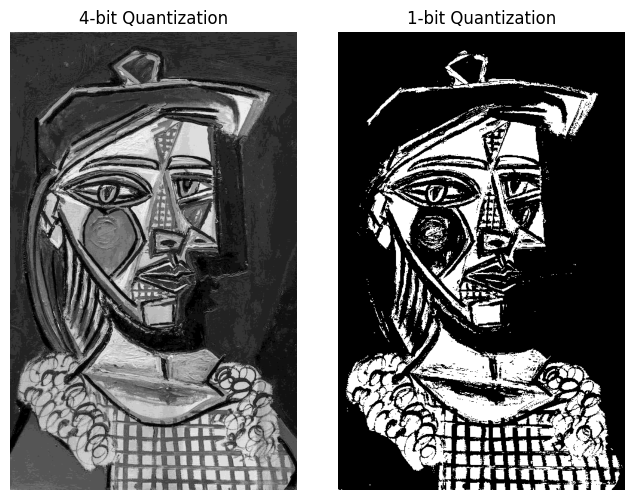

As expected we see that the 1 bit has changed a bit of how the pic looks like


In [13]:
# Creating a function to not use the same code, that quantinized the data
def quantize_image(img, bits):
    # Calculate quantization levels
    levels = 2**bits

    # Normalize to [0, levels-1] and quantize
    quantized_image = np.round(img * (levels - 1)) / (levels - 1)

    return quantized_image

# Quantize to 4 bits
quantized_4bit = quantize_image(normalized_image, bits=4)

# Quantize to 1 bit
quantized_1bit = quantize_image(normalized_image, bits=1)

# Display images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(quantized_4bit, cmap='gray')
plt.title("4-bit Quantization")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(quantized_1bit, cmap='gray')
plt.title("1-bit Quantization")
plt.axis('off')

plt.tight_layout()
plt.show()

# Explain the results
print("As expected we see that the 1 bit has changed a bit of how the pic looks like")

### **1.6 Histogram Equalization**

1. Read the image named dog.jpg ,transform it into a gray scale image of type
double and normalize it between [0, 1] using dip_GN_imread(file_name)

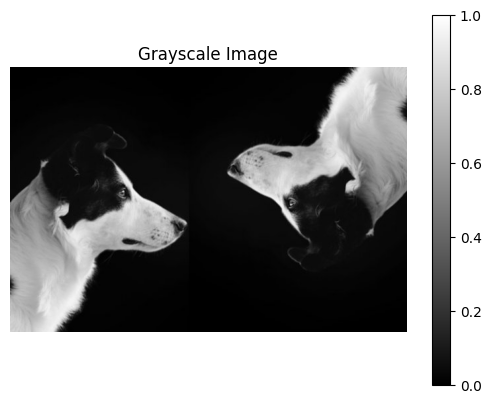

In [14]:
image_path = f"{drive_path}/dog.jpg"
dog_img = dip_GN_imread(image_path)
plt.imshow(dog_img, cmap='gray') # Set the parameter cmap to gray
plt.title("Grayscale Image")
plt.axis('off')
# Add a colorbar to the image.
plt.colorbar()
plt.show()

2. Use the Python’s cv2.equalizeHist() to apply the histogram equalization on the image .

In [15]:
grayscale_image_8bit = (dog_img * 255).astype(np.uint8)
equalized_image_dog = cv2.equalizeHist(grayscale_image_8bit)

3. Display the new image and the corresponding histogram.

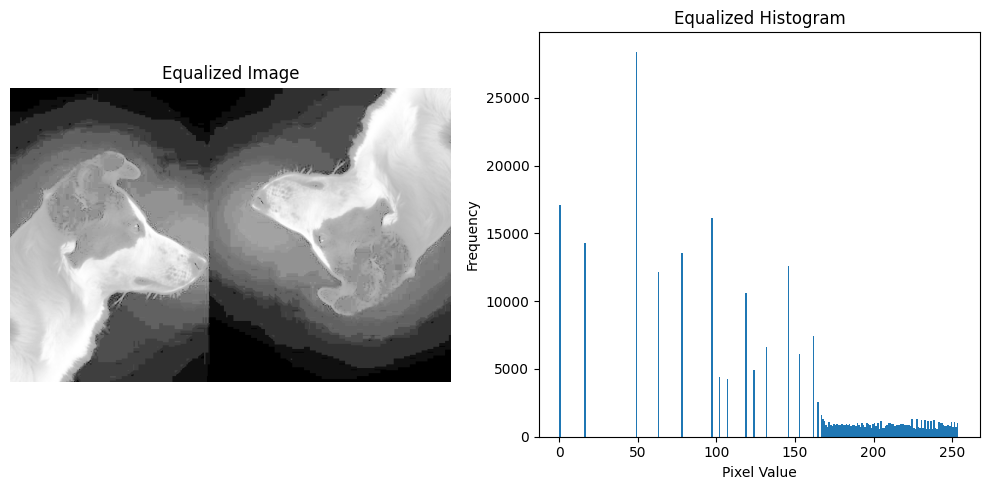

In [16]:
# Display the equalized image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(equalized_image_dog, cmap='gray')
plt.title("Equalized Image")
plt.axis('off')

# Calculate and display the histogram of the equalized image
hist_equalized, bin_edges = dip_histogram(equalized_image_dog, nbins=256)

plt.subplot(1, 2, 2)
plt.bar(bin_edges[:-1], hist_equalized, width=bin_edges[1] - bin_edges[0], align='edge')
plt.title("Equalized Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

4. Why histogram equalization fail in enhance the image?
it can fail on a few resons:
- because if the limit of the dynamic range
- it can amplify noise
- can loss some important details

### **1.7 Histogram Matching - Optional Section**

1. Take an image using your camera/phone/computer, read the image and
transform it into a gray scale image of type double and normalize it be-
tween [0, 1] using dip_GN_imread(file_name) function.

In [17]:
image_path = f"{drive_path}/my_dog.jpg"
my_dog_img = dip_GN_imread(image_path)

2. Read the image named city.jpg and transform it into a gray scale image of
type double and normalize it between [0, 1] using dip_GN_imread(file_name).

In [18]:
image_path_city = f"{drive_path}/city.jpg"
city_img = dip_GN_imread(image_path_city)

3. Read the image named face.jpg ,cast it into a double type and normalize
it between [0, 1].

In [19]:
image_path_face = f"{drive_path}/face.jpg"
# Read the image using Python’s cv2.imread()
img = cv2.imread(image_path_face)
image_float = np.float64(img)
# Normalize the image between [0, 1]
normalized_image_face = (image_float - np.min(image_float)) / (np.max(image_float) - np.min(image_float))


4. Display all the three images and their corresponding histograms.

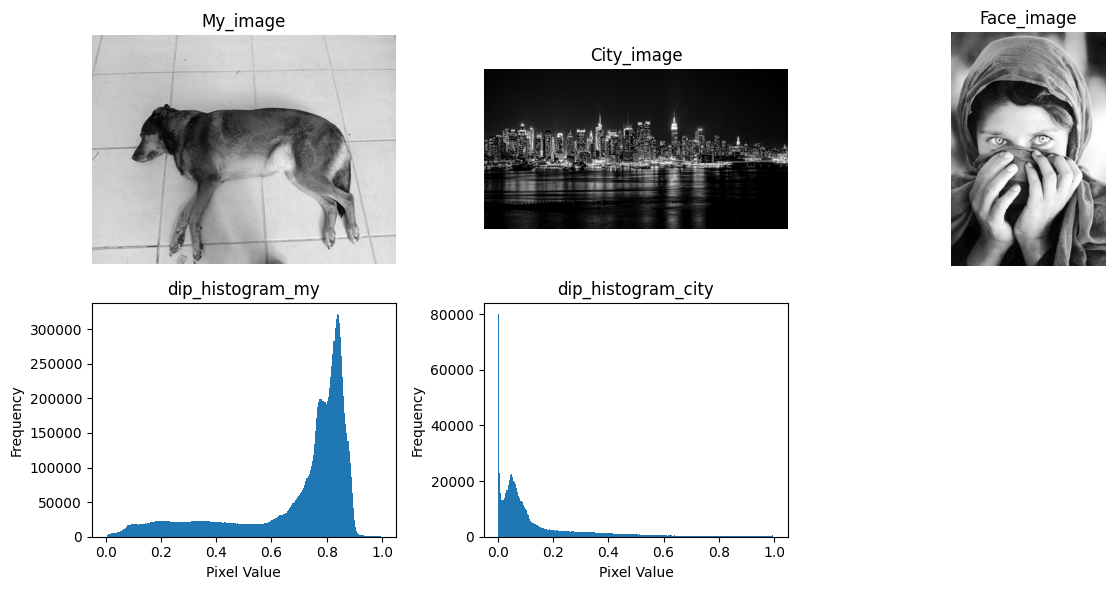

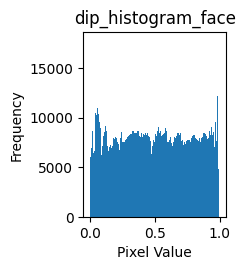

In [20]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(my_dog_img, cmap='gray')
plt.title("My_image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(city_img, cmap='gray')
plt.title("City_image")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(normalized_image_face, cmap='gray')
plt.title("Face_image")
plt.axis('off')


# Histogram
hist_dip_my, bin_edges_dip_my = dip_histogram(my_dog_img, nbins=256)
hist_dip_city, bin_edges_dip_city = dip_histogram(city_img, nbins=256)
hist_dip_face, bin_edges_dip_face = dip_histogram(normalized_image_face, nbins=256)


plt.subplot(2, 3, 4)
plt.bar(bin_edges_dip_my[:-1], hist_dip_my, width=bin_edges_dip_my[1] - bin_edges_dip_my[0], align='edge')
plt.title("dip_histogram_my")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.tight_layout()

plt.subplot(2, 3, 5)
plt.bar(bin_edges_dip_city[:-1], hist_dip_city, width=bin_edges_dip_city[1] - bin_edges_dip_city[0], align='edge')
plt.title("dip_histogram_city")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.subplot(2, 3, 6)
plt.bar(bin_edges_dip_face[:-1], hist_dip_face, width=bin_edges_dip_face[1] - bin_edges_dip_face[0], align='edge')
plt.title("dip_histogram_face")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

5. Use the Python function skimage.exposure.match_histograms() to match the histogram of your image to the histogram of face.jpg and city.jpg.

In [21]:
from skimage.exposure import match_histograms
# Match histogram to "face.jpg"
matched_face = match_histograms(my_dog_img, dip_GN_imread(image_path_face))

# Match histogram to "city.jpg"
matched_city = match_histograms(my_dog_img, city_img)

6. Display the new images and their corresponding histograms.

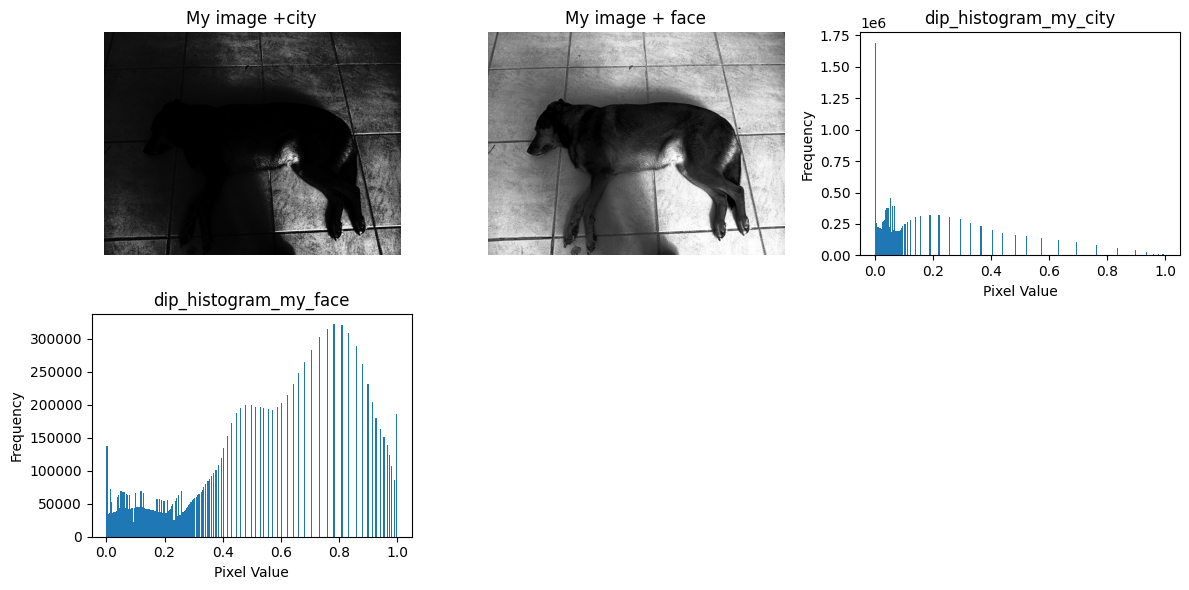

In [22]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(matched_city, cmap='gray')
plt.title("My image +city")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(matched_face, cmap='gray')
plt.title("My image + face")
plt.axis('off')


# Histogram
hist_dip_city, bin_edges_dip_city = dip_histogram(matched_city, nbins=256)
hist_dip_face, bin_edges_dip_face = dip_histogram(matched_face, nbins=256)

plt.subplot(2, 3, 3)
plt.bar(bin_edges_dip_city[:-1], hist_dip_city, width=bin_edges_dip_city[1] - bin_edges_dip_city[0], align='edge')
plt.title("dip_histogram_my_city")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.tight_layout()

plt.subplot(2, 3, 4)
plt.bar(bin_edges_dip_face[:-1], hist_dip_face, width=bin_edges_dip_face[1] - bin_edges_dip_face[0], align='edge')
plt.title("dip_histogram_my_face")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


7. Explain the results. In your explanation, consider the quality of the new
images.

as we seen above
the city image in the histogram most of the values were low, this is why the city + my image is don't have a lot of high value. in the face there is more, so that is why there is more in the face +my. we see this in the histogram but also in the image itself as well

## **2. Spatial Filters and Noise**

### **2.1 Read the Image**
Read the image named dog.jpg and transform it into a gray scale normalized
image in the range [0, 1] using dip_GN_imread(file_name). Use this image
from now on.

In [23]:
image_path_dog = f"{drive_path}/dog.jpg"
dog_img = dip_GN_imread(image_path_dog)

### **2.2 Mean vs Median Filter**

1.  Write a function named mean_filter(img, k) that will apply a 2-D k-by-k
mean filter on the image ’img’. Make sure that the size of the output
image is the same as the input image. Find a method to address the
boundaries and explain how you implemented it.

In [24]:
def calculate_mean_neighborhood(neighborhood):
    # Flatten the neighborhood into a 1D list
    flattened_neighborhood = [item for sublist in neighborhood for item in sublist]

    # Calculate the sum of all elements
    total_sum = sum(flattened_neighborhood)

    # Calculate and return the mean
    mean_value = total_sum / len(flattened_neighborhood)
    return mean_value

def mean_filter(img, k):
    # Get image dimensions
    height, width = img.shape

    # Create a padded image for boundary handling so I won't get out of bounds
    # zero padding
    row = height + 2*(k //2)
    col = width +2*(k //2)
    padded_img = np.zeros((row,col))
    padded_img[k//2:(row-k//2), k//2 :(col - k //2)] = img

    # Initialize the filtered image
    filtered_img = np.zeros_like(img, dtype=np.float64)

    # Apply the mean filter
    for i in range(height):
        for j in range(width):
            # Extract the neighborhood
            neighborhood = padded_img[i:i + k, j:j + k]
            # Calculate the mean and assign to the filtered image
            filtered_img[i, j] = calculate_mean_neighborhood(neighborhood)
    #I am only running on the range of hight and width so all the adding padding the image will not change the size, filtered_img will have the same size

    return filtered_img

2. Write a function named median_filter(img, k)
that will apply a 2-D k-by-k median filter on the image ’img’. Make sure
that the size of the output image is the same as the input image. Find a
method to deal with the boundaries.

In [25]:
def calculate_median_neighborhood(neighborhood):
    # Flatten the neighborhood into a 1D list
    flattened_neighborhood = [item for sublist in neighborhood for item in sublist]

    # Sort the flattened neighborhood
    flattened_neighborhood.sort()

    # Calculate the median
    n = len(flattened_neighborhood)
    if n % 2 == 0:  # Even number of elements
        median_value = (flattened_neighborhood[n // 2 - 1] + flattened_neighborhood[n // 2]) / 2
    else:  # Odd number of elements
        median_value = flattened_neighborhood[n // 2]

    return median_value

def median_filter(img, k):
    # Get image dimensions
    height, width = img.shape

    # Create a padded image for boundary handling so I won't get out of bounds
    row = height + 2*(k //2)
    col = width +2*(k //2)
    padded_img = np.zeros((row,col))
    padded_img[k//2:(row-k//2), k//2 :(col - k //2)] = img


    # Initialize the filtered image
    filtered_img = np.zeros_like(img, dtype=np.float64)

    # Apply the mean filter
    for i in range(height):
        for j in range(width):
            # Extract the neighborhood
            neighborhood = padded_img[i:i + k, j:j + k]
            # Calculate the mean and assign to the filtered image
            filtered_img[i, j] = calculate_median_neighborhood(neighborhood)
    #I am only running on the range of hight and width so all the adding padding the image will not change the size, filtered_img will have the same size

    return filtered_img

3. Filter the dog.jpg image using the functions above for k=3, 9, display the results and explain the results (refer to median vs. mean and the
kernel size effect ).

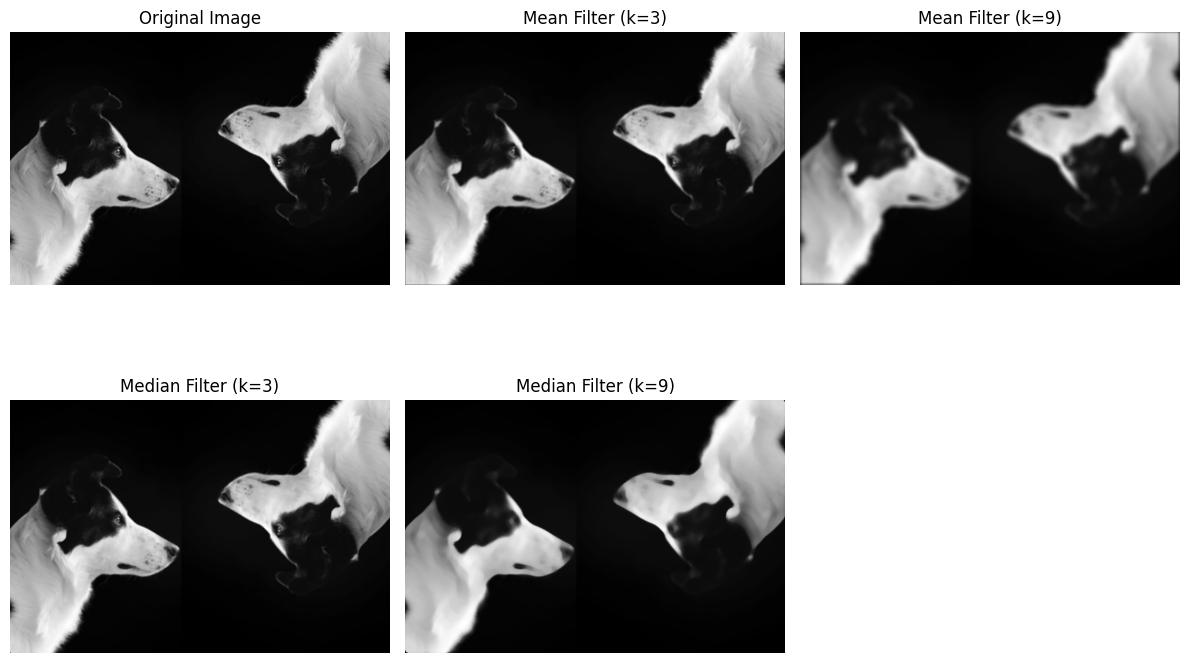

We can see here a few things: 
1. k=3 had a smaller effect then k=9 - which makes sense, becuase we took a smaller range 
2. the mean is bluerer then median becuase the mean avrages avereything out. (blures but same) as appose to mean which takes the middle value


In [26]:
# Mean
# Filter with k=3
mean_filtered_3 = mean_filter(dog_img, k=3)
# Filter with k=9
mean_filtered_9 = mean_filter(dog_img, k=9)
#Median
# Filter with k=3
median_filtered_3 = median_filter(dog_img, k=3)

# Filter with k=9
median_filtered_9 = median_filter(dog_img, k=9)

# Display the images
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(dog_img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(mean_filtered_3, cmap='gray')
plt.title("Mean Filter (k=3)")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(mean_filtered_9, cmap='gray')
plt.title("Mean Filter (k=9)")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(median_filtered_3, cmap='gray')
plt.title("Median Filter (k=3)")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(median_filtered_9, cmap='gray')
plt.title("Median Filter (k=9)")
plt.axis('off')


plt.tight_layout()
plt.show()

# Explain the results
print("We can see here a few things: \n1. k=3 had a smaller effect then k=9 - which makes sense, becuase we took a smaller range \n2. the mean is bluerer then median becuase the mean avrages avereything out. (blures but same) as appose to mean which takes the middle value")

### **2.3 Gaussian Filter**

1.  Write a function named dip_gaussian_filter(img, k, sigma) that will ap-
ply a 2-D k-by-k Gaussian filter on the image ’img’. The smoothing kernel
should be with covariance matrix of
   $$
   \begin{bmatrix}
   \sigma & 0 \\
   0 & \sigma
   \end{bmatrix}
   $$
Hint: use np.meshgrid() function in Python to create the grid and apply the Gaussian formula on the grid to create
your kernel.

In [27]:
def gaussian_kernel(k, sigma):
  # Create a grid of coordinates
  x, y = np.meshgrid(np.arange(k) - k // 2, np.arange(k) - k // 2)
  # Calculate the Gaussian values
  kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
  # Normalize the kernel
  kernel /= np.sum(kernel)
  return kernel
def dip_gaussian_filter(img, k, sigma):
  # Get kernel
  kernel = gaussian_kernel(k, sigma)
  # Apply convolution
  filtered_img = cv2.filter2D(img, -1, kernel)

  return filtered_img

2. Display the filtered images using (k, sigma) = (3, 0.2), (3, 1.7), (9,0.2). Briefly explain your results.

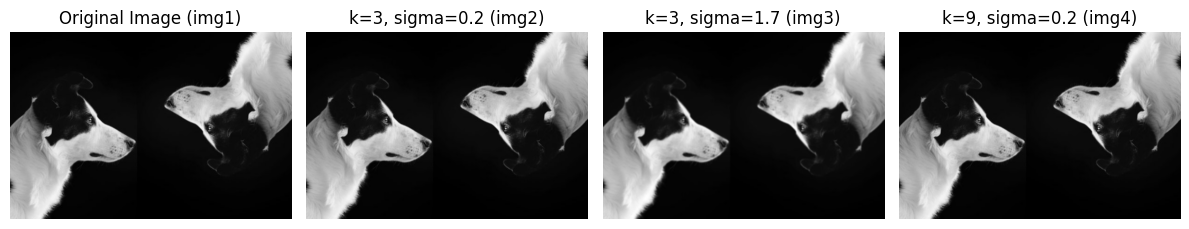

Here it was a bit difficult to see the changes, becuase the k and sigma were not that high. but when I looked clossly I could see as expected the pic 2 and 4 were a bit blure but 3 was a bit more then them, because the sigma was higher, in pic 4 the k is high but sigma was really low so we don't see too much blure. but we do see it smother


In [28]:
filtered_image_1 = dip_gaussian_filter(dog_img, k=3, sigma=0.2)
filtered_image_2 = dip_gaussian_filter(dog_img, k=3, sigma=1.7)
filtered_image_3 = dip_gaussian_filter(dog_img, k=9, sigma=0.2)

# Display the images
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(dog_img, cmap='gray')
plt.title("Original Image (img1)")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(filtered_image_1, cmap='gray')
plt.title("k=3, sigma=0.2 (img2)")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(filtered_image_2, cmap='gray')
plt.title("k=3, sigma=1.7 (img3)")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(filtered_image_3, cmap='gray')
plt.title("k=9, sigma=0.2 (img4)")
plt.axis('off')

plt.tight_layout()
plt.show()
# Explain the results
print("Here it was a bit difficult to see the changes, becuase the k and sigma were not that high. but when I looked clossly I could see as expected the pic 2 and 4 were a bit blure but 3 was a bit more then them, because the sigma was higher, in pic 4 the k is high but sigma was really low so we don't see too much blure. but we do see it smother")

3. Subtract the original image from one of the filtered images. Display
the new image using  Python’s plt.imshow() . Explain what you see.

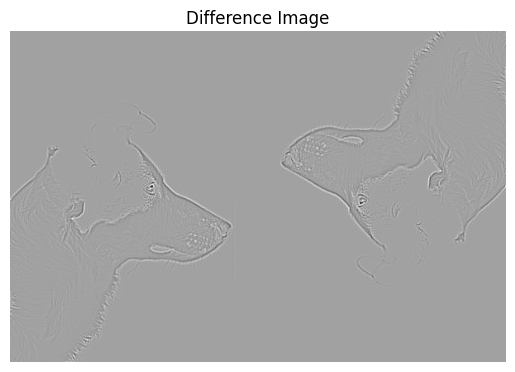

In [29]:
#Subtract the original image from one of the filtered images
diff_image = filtered_image_2 - dog_img

# Display the new image
plt.imshow(diff_image, cmap='gray')
plt.title("Difference Image")
plt.axis('off')
plt.show()


### **2.4 Noise Filtering**

1.  Create 2 new images by adding 2 different kinds of noises to the original image using Python’s skimage.util.random_noise()
function. The noises are: ’salt & pepper’, ’gaussian’.

In [30]:
from skimage.util import random_noise
# Add salt & pepper noise
noisy_sp = random_noise(dog_img, mode='s&p', amount=0.1)

# Add Gaussian noise
noisy_gaussian = random_noise(dog_img, mode='gaussian', var=0.01)

2. Apply the implemented filters on each of the noisy images. Use kernel
sizes of 3x3 and 9x9 for mean, median and gaussian filters. Display only
the best filter result for each noisy image.

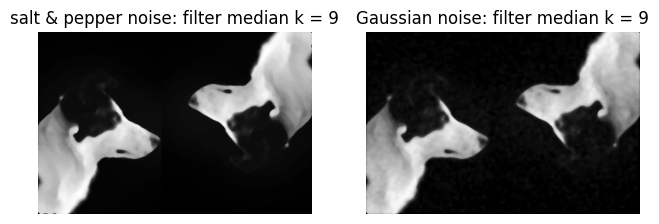

In [31]:
def get_the_best(best_img, best_score, new_img, img, name1, current_best_name):
    # Calculate the mean difference between new_img and the original img
    new_score = (new_img - img).mean()

    # If the new score is better, update the best image, score, and name
    if new_score < best_score:
        return new_img, new_score, name1
    else:
        # Otherwise, keep the current best
        return best_img, best_score, current_best_name


def get_best(img):
    # Initialize with the first comparison
    best_img = mean_filter(img, k=3)
    best_score = (best_img - img).mean()
    name = "mean k = 3"

    # Compare against other filters
    best_img, best_score, name = get_the_best(best_img, best_score, mean_filter(img, k=9), img, "mean k = 9", name)
    best_img, best_score, name = get_the_best(best_img, best_score, median_filter(img, k=3), img, "median k = 3", name)
    best_img, best_score, name = get_the_best(best_img, best_score, median_filter(img, k=9), img, "median k = 9", name)
    best_img, best_score, name = get_the_best(best_img, best_score, dip_gaussian_filter(img, k=3, sigma=0.2), img, "gaus k = 3", name)
    best_img, best_score, name = get_the_best(best_img, best_score, dip_gaussian_filter(img, k=9, sigma=0.2), img, "gaus k = 9", name)

    return best_img, name

plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
best_filter_dog, name = get_best(noisy_sp)
plt.imshow(best_filter_dog, cmap='gray')
plt.title(f"salt & pepper noise: filter {name}")
plt.axis('off')

plt.subplot(2, 3, 2)
best_filter_dog, name = get_best(noisy_gaussian)
plt.imshow(best_filter_dog, cmap='gray')
plt.title(f"Gaussian noise: filter {name}")
plt.axis('off')
plt.show()


3. Briefly explain your results. What is the effect of each filter on each noise?
Which is the best filter for any given noise? what kernel size work the best?
What are the pros and cons of each filter?

it wasn't explained how to do best filter result, I did as before the minus and mean, I think this made my result a bit wierd, so I'm writting a thoritical answer
mean: avrage. k=3 most of the time reduces the noise in a small nighberhod, k=9 most of the time creates blures
midean midien. k=3 should work good with s&p becuase it reduces this type of noise. k=9. reduces better the noise but sometimes add blures as well.
Gaussian. k=3 smoth the image with wight, should be effective for guassian noise. k=9 smoths but also adds bluring




## **3. Bonus Question**
Choose a noisy image (you can "trash" a clean image or start with noisy one) as
you wish and try to fix it using the histogram manipulation and filters. You are
more then welcome to use other ways. Display the initial image together with
the modified image in the document. Be creative! One of the images will
be chosen by the course staff and it’s authors will receive 0.5 bonus
point to the final grade. The staff will judge by the visual result, originality
and the code. Explain!